In [1]:
# Source from https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# Importing Python Dependencies
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df = pd.read_excel("ETH.xlsx")

In [2]:
df['Date'].min(), df['Date'].max()

(Timestamp('2015-08-09 00:00:00'), Timestamp('2020-04-26 00:00:00'))

In [3]:
df = df.sort_values('Date')
df.isnull().sum()

Date        0
PriceUSD    0
PriceIDR    0
dtype: int64

In [4]:
df = df.groupby('Date').sum().reset_index()

In [5]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2015-08-09', '2015-08-12', '2015-08-15', '2015-08-18',
               '2015-08-21', '2015-08-24', '2015-08-27', '2015-08-30',
               '2015-09-02', '2015-09-05',
               ...
               '2020-03-30', '2020-04-02', '2020-04-05', '2020-04-08',
               '2020-04-11', '2020-04-14', '2020-04-17', '2020-04-20',
               '2020-04-23', '2020-04-26'],
              dtype='datetime64[ns]', name='Date', length=574, freq=None)

In [6]:
y = df['PriceIDR'].resample('MS').mean()

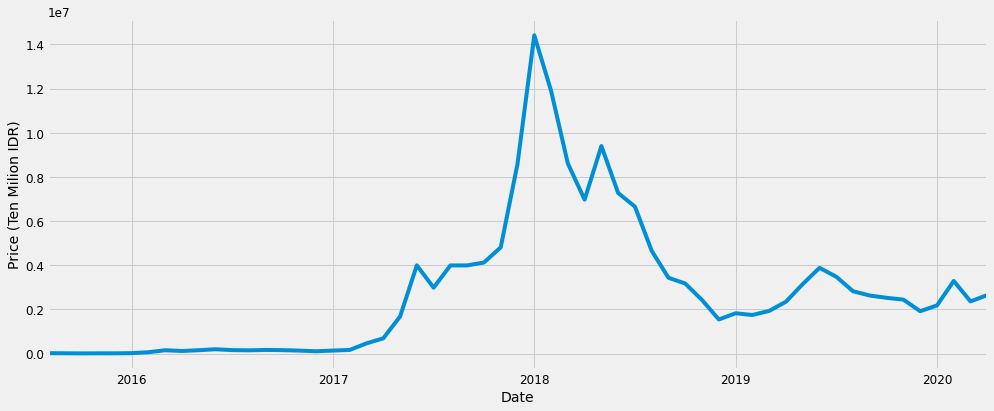

In [7]:
y.plot(figsize=(15, 6))
plt.ylabel('Price (Ten Milion IDR)')
plt.show()

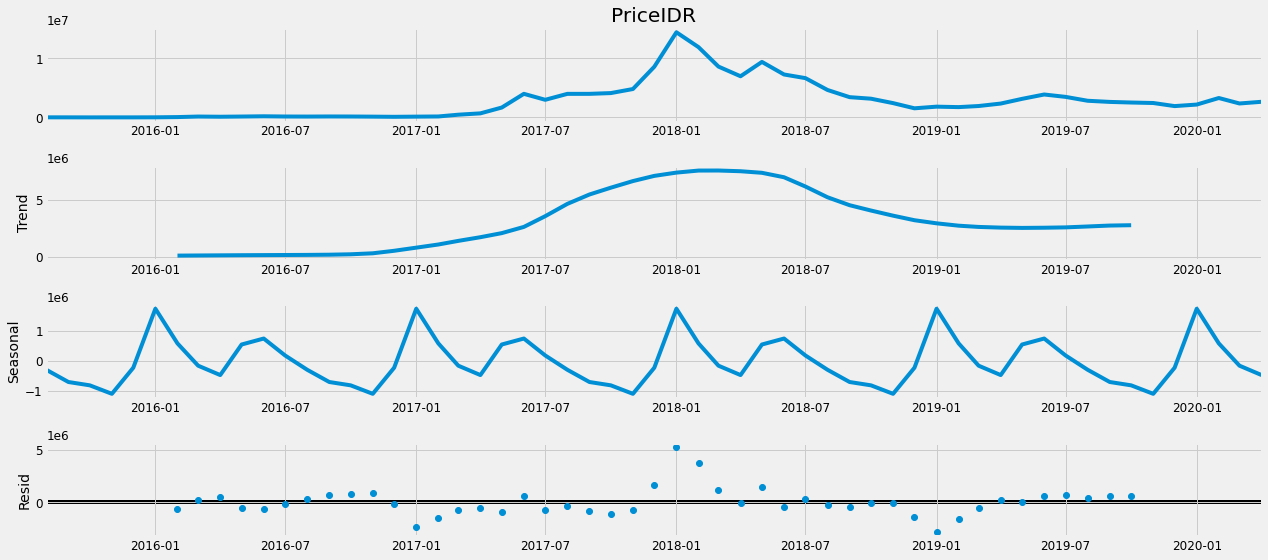

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()

plt.show()


In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA ...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA ...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                y,
                order = param,
                seasonal_order = param_seasonal,
                enforce_stationarity = False,
                enforce_invertibility = False
            )
            results = mod.fit(maxiter=200)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1869.4589481533549
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1510.6914279368482
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1487.7634230330768
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2872.3476225757972
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1506.8416876194951
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1660.6377733812847
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1117.9690668619978
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2859.227897030074
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1799.6055158912025
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1412.9156136298568
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1424.6010599627064
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2915.4099218576534
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1476.897554766927
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1413.8060843086487
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1095.4510940188234
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2905.1531331864894
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1710.4138012718315
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1545.40830813

In [21]:
mod = sm.tsa.statespace.SARIMAX(
    y,
    order = (1, 1, 1),
    seasonal_order = (1, 1, 0, 12),
    enforce_stationarity = False,
    enforce_invertibility = False
)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0411      0.785     -0.052      0.958      -1.579       1.497
ma.L1          0.3153      0.822      0.383      0.701      -1.296       1.927
ar.S.L12      -0.6016      0.203     -2.959      0.003      -1.000      -0.203
sigma2      4.878e+12   1.13e-13   4.31e+25      0.000    4.88e+12    4.88e+12


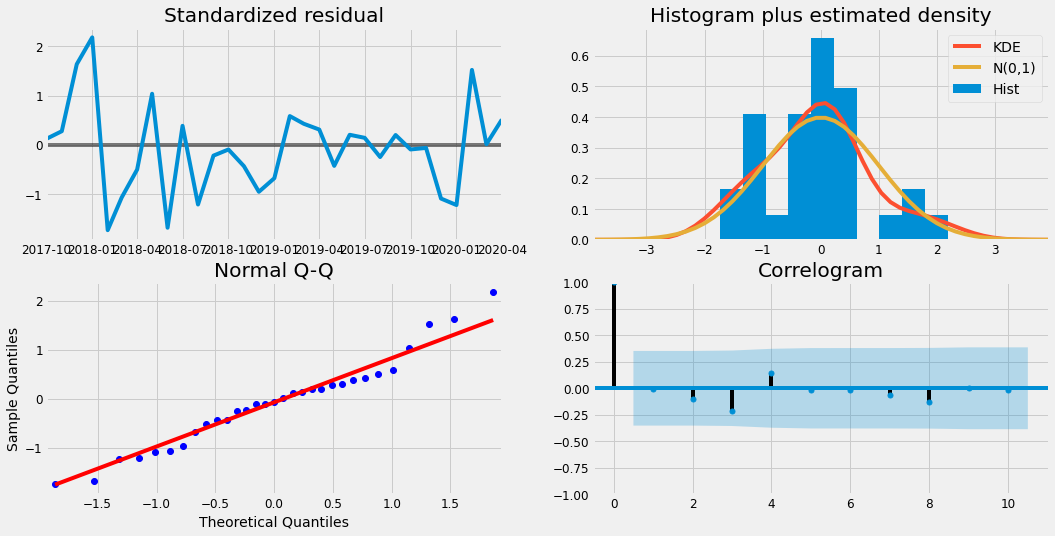

In [22]:
results.plot_diagnostics(figsize = (16, 8))
plt.show()

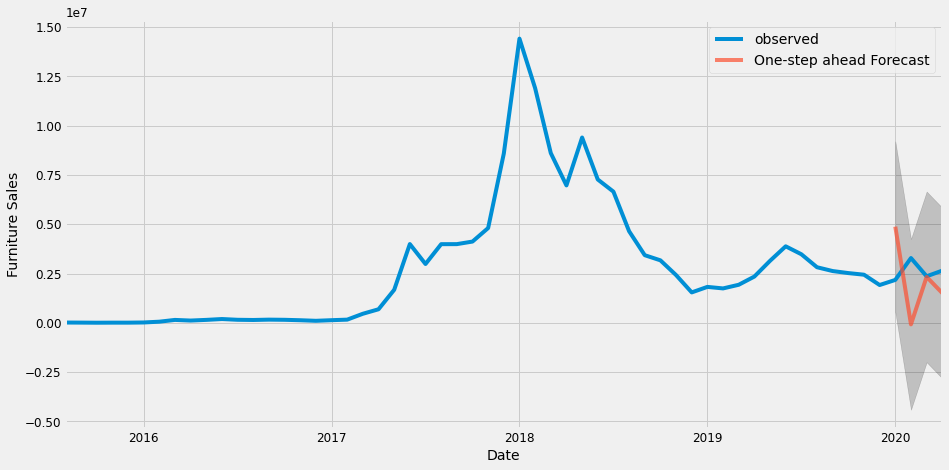

In [23]:
pred = results.get_prediction(start = pd.to_datetime('2020-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2009':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 4979086091168.08
The Root Mean Squared Error of our forecasts is 2231386.58


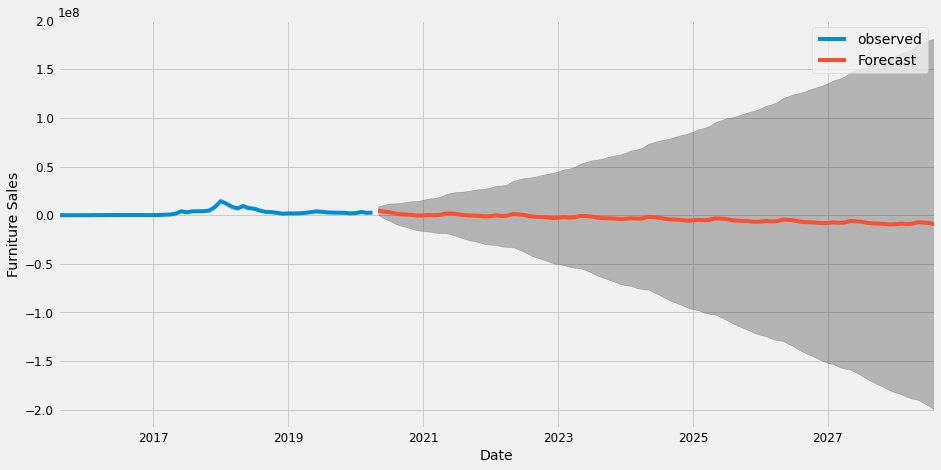

In [25]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color = 'k',
    alpha = .25
)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()